In [1]:
import anndata
import scvelo as scv
import pandas as pd
import os
import numpy as np
import numpy as np
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import scanpy as sc
SEED = 2024
np.random.seed(SEED)
import unitvelo as utv

(Running UniTVelo 0.2.5.2)
2024-10-28 02:45:05


In [2]:
simuID_list = ['bifurcating_converging_seed1', 'bifurcating_converging_seed2', 'bifurcating_converging_seed3' ,'bifurcating_cycle_seed1', 'bifurcating_cycle_seed2', 'bifurcating_cycle_seed3' ,'bifurcating_loop_seed1', 'bifurcating_loop_seed2', 'bifurcating_loop_seed3' ,'bifurcating_seed1', 'bifurcating_seed2' ,'bifurcating_seed3' ,'binary_tree_seed1' ,'binary_tree_seed2', 'binary_tree_seed3', 'branching_seed1', 'branching_seed2', 'branching_seed3', 'consecutive_bifurcating_seed1', 'consecutive_bifurcating_seed2' ,'consecutive_bifurcating_seed3', 'converging_seed1', 'converging_seed2','converging_seed3', 'cycle_seed1', 'cycle_seed2', 'cycle_seed3' ,'cycle_simple_seed1' ,'cycle_simple_seed2', 'cycle_simple_seed3', 'disconnected_seed1' ,'disconnected_seed2', 'disconnected_seed3' ,'linear_seed1' ,'linear_seed2', 'linear_seed3', 'linear_simple_seed1' ,'linear_simple_seed2', 'linear_simple_seed3', 'trifurcating_seed1' ,'trifurcating_seed2' ,'trifurcating_seed3' ]


In [3]:
############################## velocity_pca2
cosine_sim_list = {}
pearson_list = {}
spearman_list = {}

for simuID in simuID_list:
    cosine_sim_list_tmp = {}
    pearson_list_tmp = {}
    spearman_list_tmp = {}
    
    adata_raw = scv.read("/lustre/home/zhangxiaochang/project/liyr/data/dyngen/result_0921/anndata/"+simuID+"/anndata.h5ad")
    
    
    print("\n")
    print(simuID)
    print("\n")
    file2 = "/lustre/home/zhangxiaochang/project/liyr/data/dyngen/result_0921/velocity/"+simuID+"/"+"14_veloAE"+"/"+"anndata.h5ad"
    if os.path.exists(file2):        
        adata = scv.read(file2)
        scv.tl.velocity_graph(adata)
        scv.tl.velocity_embedding(adata,basis="pca")
        #velocity = pd.DataFrame(adata.obsm["velocity_pca"][:,0:30])
        #ground_truth_velocity = pd.DataFrame(adata.obsm["ground_truth_velocity_pca"][:,0:30])
        df1 = pd.DataFrame(adata.obsm["velocity_pca"][:,0:2])
        df2 = pd.DataFrame(adata_raw.obsm["ground_truth_velocity_pca"][:,0:2])
        
        velocity =df1.dropna(axis=0,how = 'any').T
        ground_truth_velocity = df2[~df1.isna().any(axis=1)].T


        # cosine similarity
        cosine_sim_matrix = cosine_similarity(velocity, ground_truth_velocity)
        cosine_sim = np.diag(cosine_sim_matrix)
        cosine_sim_list_tmp["14_veloAE"] = np.median(cosine_sim)
    
        # pearson correlation
        pearson_cor = pd.DataFrame(ground_truth_velocity).corrwith(velocity, axis=1,method='pearson')
        pearson_list_tmp["14_veloAE"] = np.median(pearson_cor.values)
    
        # spearman correlation
        spearman_cor = pd.DataFrame(ground_truth_velocity).corrwith(velocity, axis=1,method='spearman')
        spearman_list_tmp["14_veloAE"] = np.median(spearman_cor.values)
    else:
        cosine_sim_list_tmp["14_veloAE"] = np.nan
        pearson_list_tmp["14_veloAE"] = np.nan
        spearman_list_tmp["14_veloAE"] = np.nan
    cosine_sim_list[simuID] = cosine_sim_list_tmp
    pearson_list[simuID] = pearson_list_tmp
    spearman_list[simuID] = spearman_list_tmp




bifurcating_converging_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_converging_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_converging_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_cycle_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_cycle_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_cycle_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_loop_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_loop_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_loop_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


binary_tree_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


binary_tree_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


binary_tree_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


branching_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


branching_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


branching_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


consecutive_bifurcating_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


consecutive_bifurcating_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


consecutive_bifurcating_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


converging_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


converging_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


converging_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_simple_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_simple_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_simple_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


disconnected_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


disconnected_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


disconnected_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_simple_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_simple_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_simple_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


trifurcating_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


trifurcating_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


trifurcating_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


In [4]:
pd.DataFrame(cosine_sim_list).to_csv("eval/cosine_sim_velocity_pca2_14_veloAE.T.csv")
pd.DataFrame(pearson_list).to_csv("eval/pearson_sim_velocity_pca2_14_veloAE.T.csv")
pd.DataFrame(spearman_list).to_csv("eval/spearman_sim_velocity_pca2_14_veloAE.T.csv")

In [5]:
############################## trans_matrix
cosine_sim_list = {}
pearson_list = {}
spearman_list = {}

for simuID in simuID_list:
    cosine_sim_list_tmp = {}
    pearson_list_tmp = {}
    spearman_list_tmp = {}
    
    adata_raw = scv.read("/lustre/home/zhangxiaochang/project/liyr/data/dyngen/result_0921/anndata/"+simuID+"/anndata.h5ad")
    
    
    print("\n")
    print(simuID)
    print("\n")
    file2 = "/lustre/home/zhangxiaochang/project/liyr/data/dyngen/result_0921/velocity/"+simuID+"/"+"14_veloAE"+"/"+"anndata.h5ad"
    if os.path.exists(file2):        
        adata = scv.read(file2)
        scv.tl.velocity_graph(adata)
        scv.tl.velocity_embedding(adata,basis="pca")
        
        velocity = pd.DataFrame(scv.tl.transition_matrix(adata).toarray()).T
        ground_truth_velocity = pd.DataFrame(scv.tl.transition_matrix(adata_raw).toarray()).T
        
        #df1 = pd.DataFrame(adata.obsm["velocity_pca"][:,0:2])
        #df2 = pd.DataFrame(adata_raw.obsm["ground_truth_velocity_pca"][:,0:2])
        
        #velocity =df1.dropna(axis=0,how = 'any')
        #ground_truth_velocity = df2[~df1.isna().any(axis=1)]


        # cosine similarity
        cosine_sim_matrix = cosine_similarity(velocity, ground_truth_velocity)
        cosine_sim = np.diag(cosine_sim_matrix)
        cosine_sim_list_tmp["14_veloAE"] = np.median(cosine_sim)
    
        # pearson correlation
        pearson_cor = pd.DataFrame(ground_truth_velocity).corrwith(velocity, axis=1,method='pearson')
        pearson_list_tmp["14_veloAE"] = np.median(pearson_cor.values)
    
        # spearman correlation
        spearman_cor = pd.DataFrame(ground_truth_velocity).corrwith(velocity, axis=1,method='spearman')
        spearman_list_tmp["14_veloAE"] = np.median(spearman_cor.values)
    else:
        cosine_sim_list_tmp["14_veloAE"] = np.nan
        pearson_list_tmp["14_veloAE"] = np.nan
        spearman_list_tmp["14_veloAE"] = np.nan
    cosine_sim_list[simuID] = cosine_sim_list_tmp
    pearson_list[simuID] = pearson_list_tmp
    spearman_list[simuID] = spearman_list_tmp




bifurcating_converging_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_converging_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_converging_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_cycle_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_cycle_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_cycle_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_loop_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_loop_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_loop_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


bifurcating_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


binary_tree_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


binary_tree_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


binary_tree_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


branching_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


branching_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


branching_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


consecutive_bifurcating_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


consecutive_bifurcating_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


consecutive_bifurcating_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


converging_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


converging_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


converging_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_simple_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_simple_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


cycle_simple_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


disconnected_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


disconnected_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


disconnected_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_simple_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_simple_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


linear_simple_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


trifurcating_seed1


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


trifurcating_seed2


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


trifurcating_seed3


computing velocity graph (using 1/96 cores)


  0%|          | 0/2500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


In [6]:
pd.DataFrame(cosine_sim_list).to_csv("eval/cosine_sim_trans_matrix_14_veloAE.T.csv")
pd.DataFrame(pearson_list).to_csv("eval/pearson_sim_trans_matrix_14_veloAE.T.csv")
pd.DataFrame(spearman_list).to_csv("eval/spearman_sim_trans_matrix_14_veloAE.T.csv")

In [3]:
import anndata
import scvelo as scv
import pandas as pd
import os
import numpy as np
import numpy as np
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import scanpy as sc
SEED = 2024
np.random.seed(SEED)
import unitvelo as utv

(Running UniTVelo 0.2.5.2)
2024-10-22 02:18:21


In [4]:
adata_raw = scv.read("/lustre/home/zhangxiaochang/project/liyr/data/dyngen/result_0921/anndata/"+"bifurcating_converging_seed1"+"/anndata.h5ad")

In [12]:
simuID_list = ['bifurcating_converging_seed1', 'bifurcating_converging_seed2', 'bifurcating_converging_seed3' ,'bifurcating_cycle_seed1', 'bifurcating_cycle_seed2', 'bifurcating_cycle_seed3' ,'bifurcating_loop_seed1', 'bifurcating_loop_seed2', 'bifurcating_loop_seed3' ,'bifurcating_seed1', 'bifurcating_seed2' ,'bifurcating_seed3' ,'binary_tree_seed1' ,'binary_tree_seed2', 'binary_tree_seed3', 'branching_seed1', 'branching_seed2', 'branching_seed3', 'consecutive_bifurcating_seed1', 'consecutive_bifurcating_seed2' ,'consecutive_bifurcating_seed3', 'converging_seed1', 'converging_seed2','converging_seed3', 'cycle_seed1', 'cycle_seed2', 'cycle_seed3' ,'cycle_simple_seed1' ,'cycle_simple_seed2', 'cycle_simple_seed3', 'disconnected_seed1' ,'disconnected_seed2', 'disconnected_seed3' ,'linear_seed1' ,'linear_seed2', 'linear_seed3', 'linear_simple_seed1' ,'linear_simple_seed2', 'linear_simple_seed3', 'trifurcating_seed1' ,'trifurcating_seed2' ,'trifurcating_seed3' ]


bifurcating_converging_seed1 84


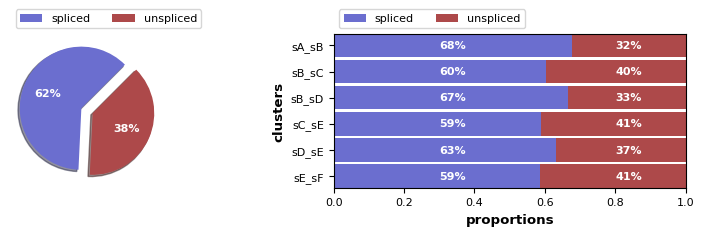

bifurcating_converging_seed2 84


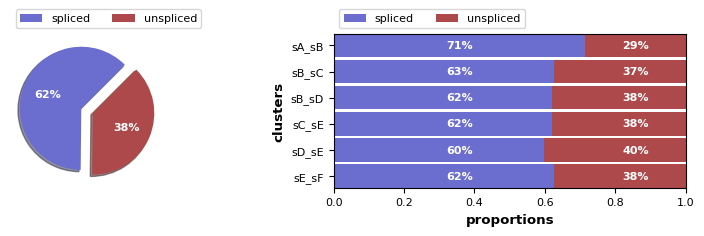

bifurcating_converging_seed3 84


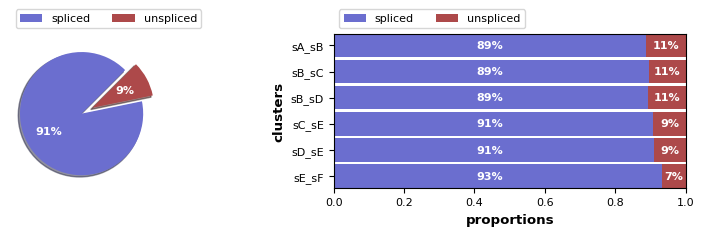

bifurcating_cycle_seed1 84


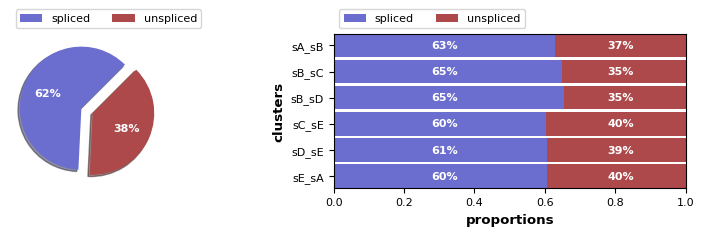

bifurcating_cycle_seed2 84


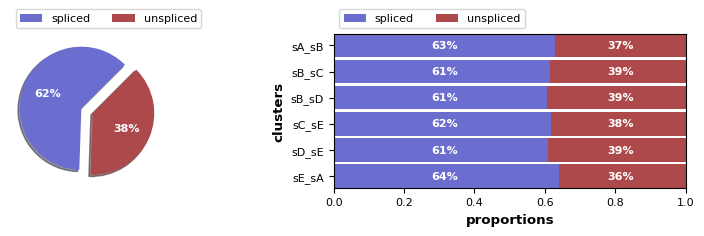

bifurcating_cycle_seed3 84


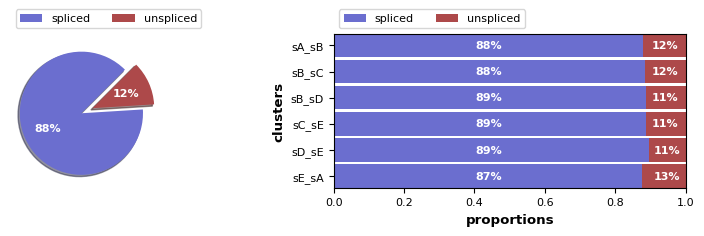

bifurcating_loop_seed1 83


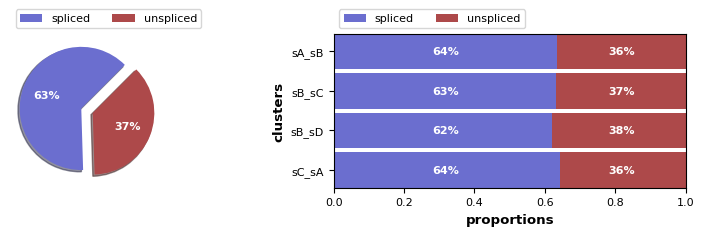

bifurcating_loop_seed2 83


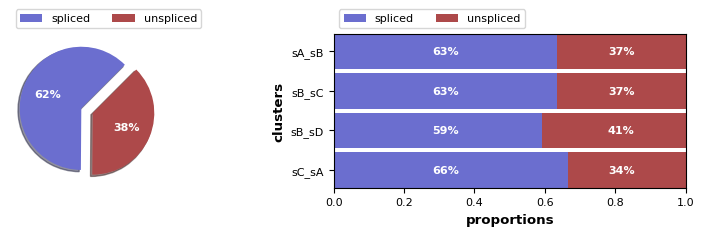

bifurcating_loop_seed3 83


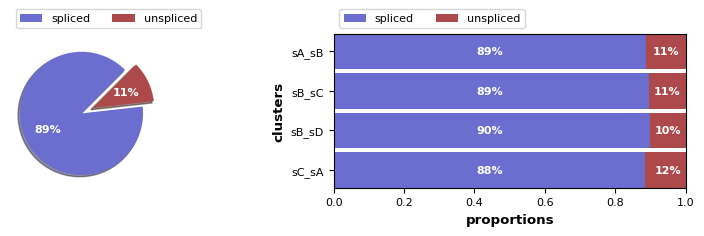

bifurcating_seed1 105


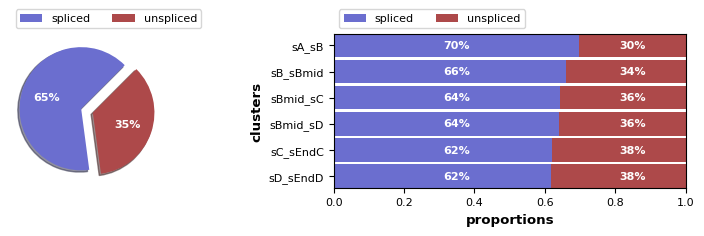

bifurcating_seed2 103


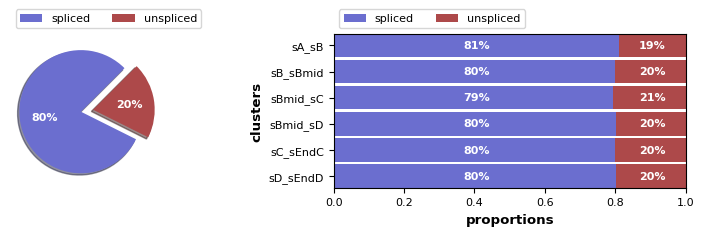

bifurcating_seed3 104


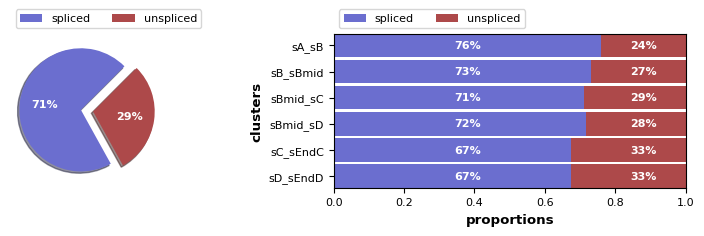

binary_tree_seed1 128


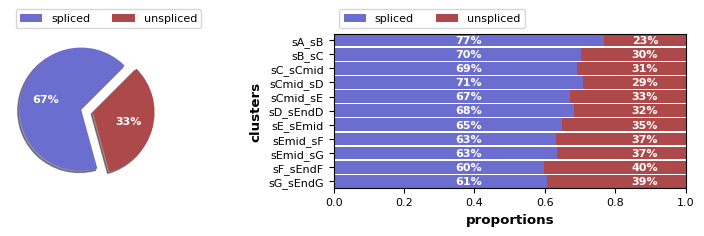

binary_tree_seed2 125


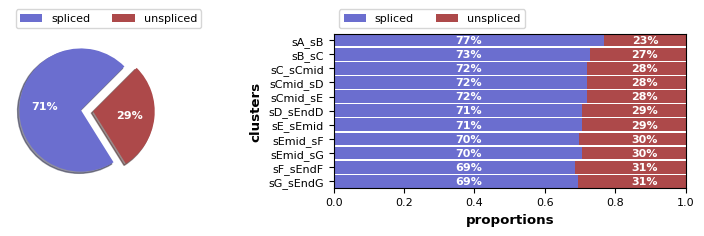

binary_tree_seed3 110


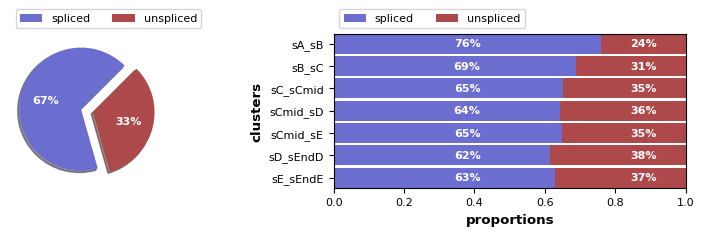

branching_seed1 153


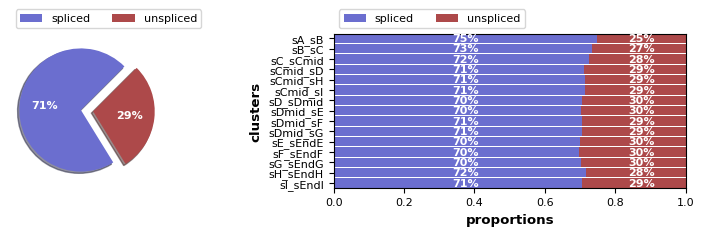

branching_seed2 158


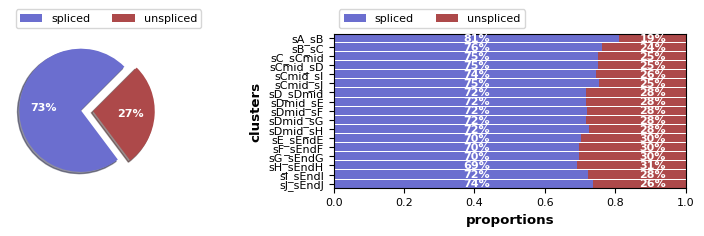

branching_seed3 112


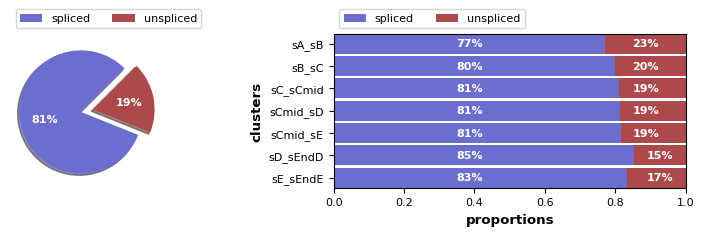

consecutive_bifurcating_seed1 129


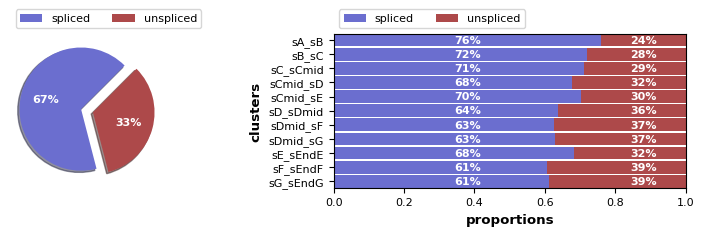

consecutive_bifurcating_seed2 127


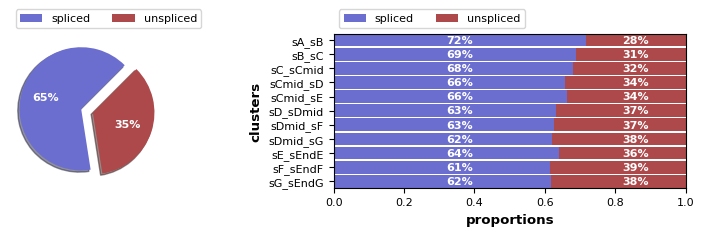

consecutive_bifurcating_seed3 128


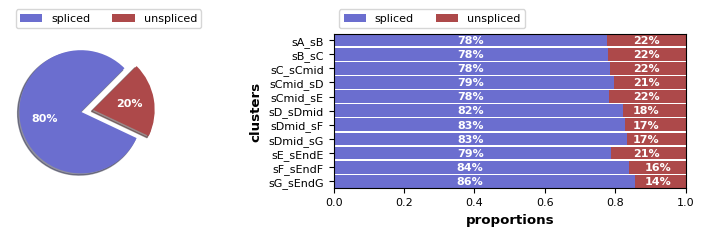

converging_seed1 86


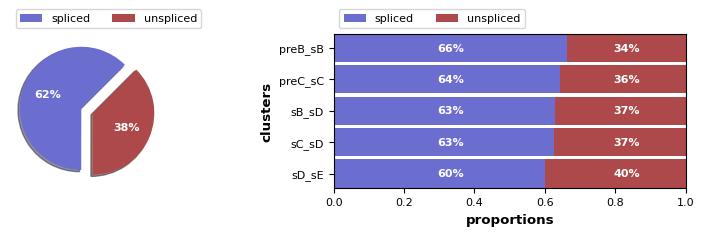

converging_seed2 86


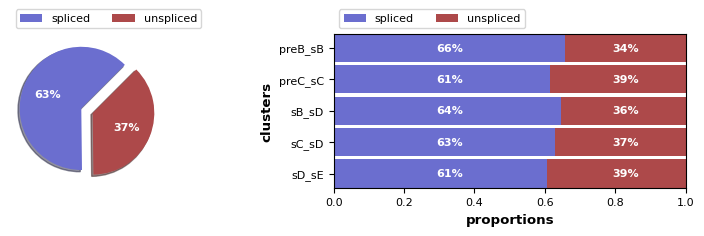

converging_seed3 86


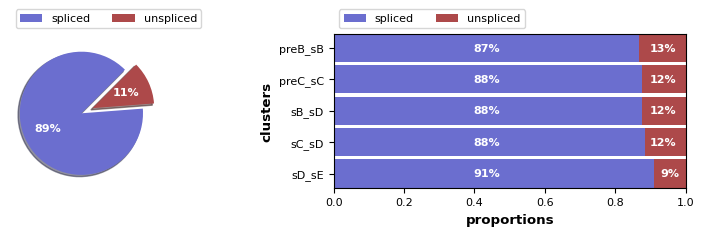

cycle_seed1 91


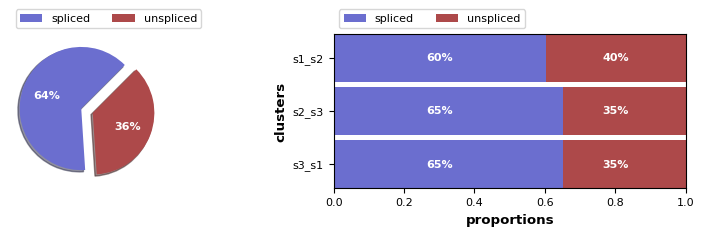

cycle_seed2 89


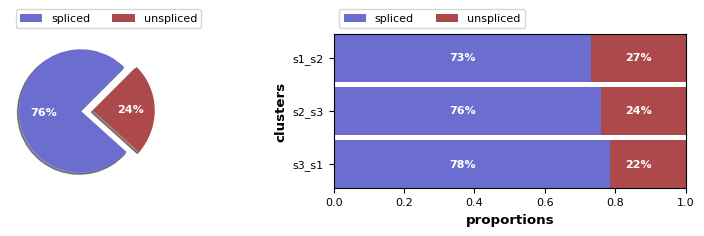

cycle_seed3 90


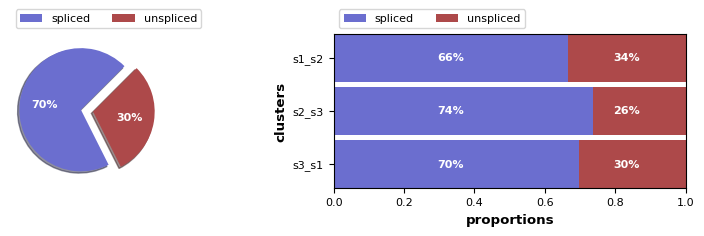

cycle_simple_seed1 75


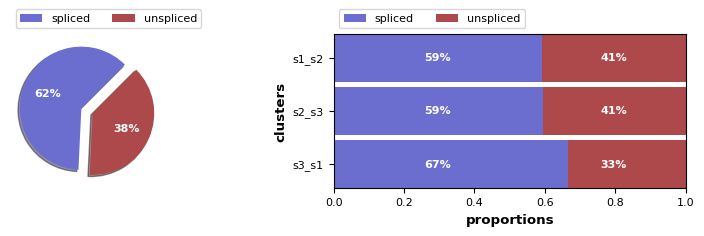

cycle_simple_seed2 75


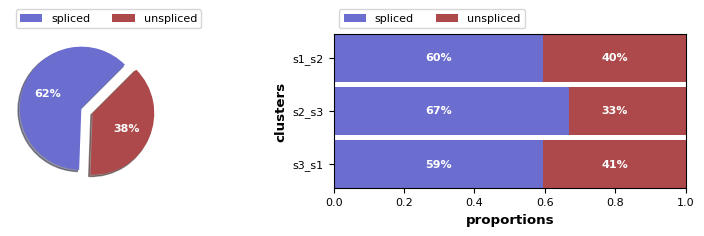

cycle_simple_seed3 75


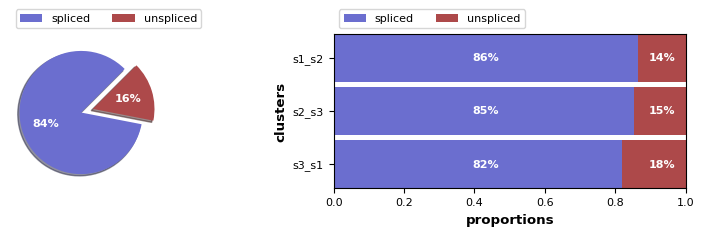

disconnected_seed1 128


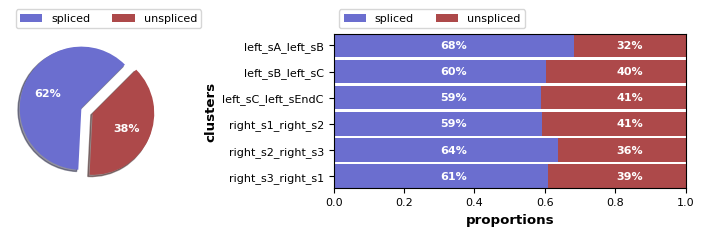

disconnected_seed2 126


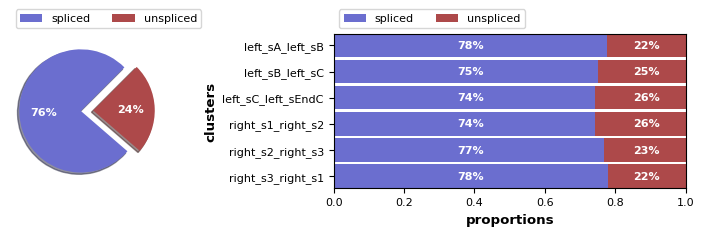

disconnected_seed3 125


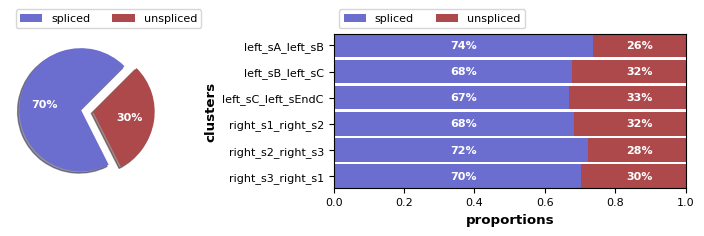

linear_seed1 91


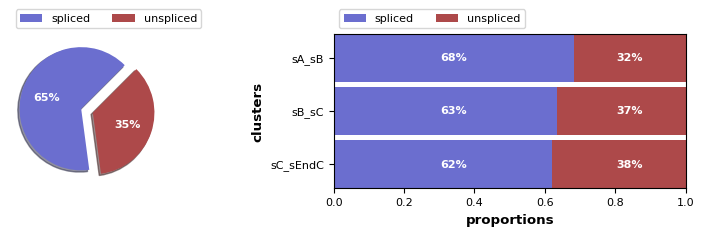

linear_seed2 89


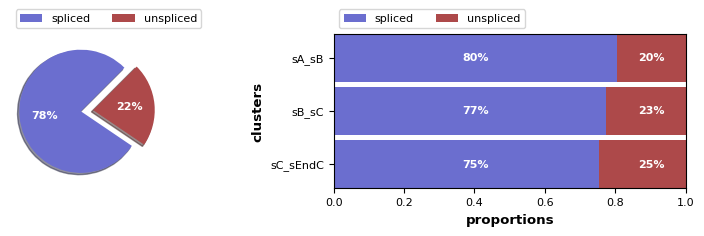

linear_seed3 90


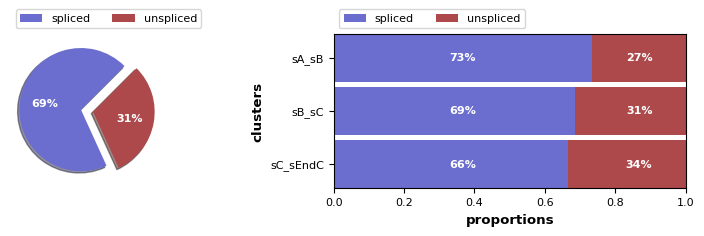

linear_simple_seed1 75


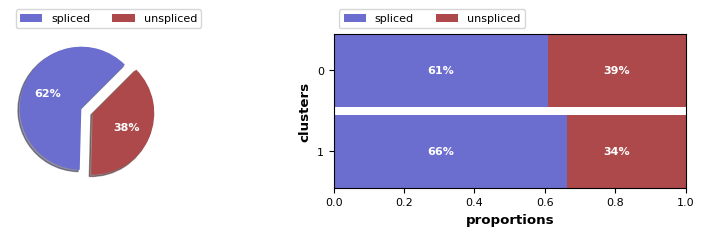

linear_simple_seed2 75


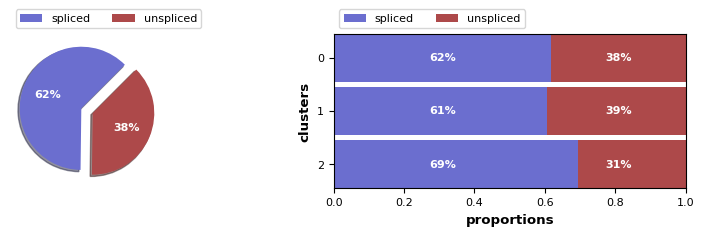

linear_simple_seed3 75


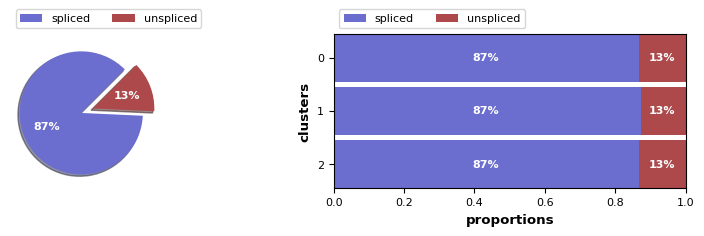

trifurcating_seed1 122


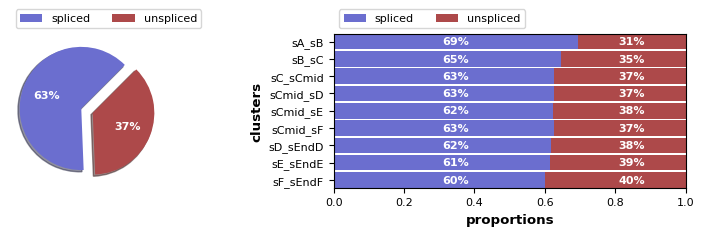

trifurcating_seed2 118


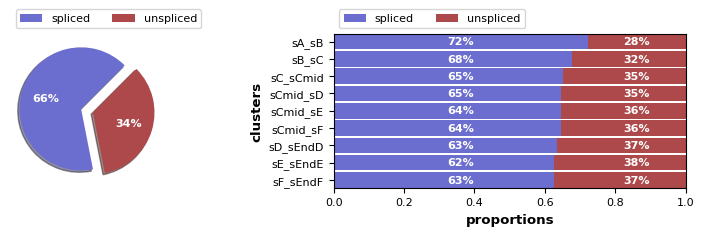

trifurcating_seed3 121


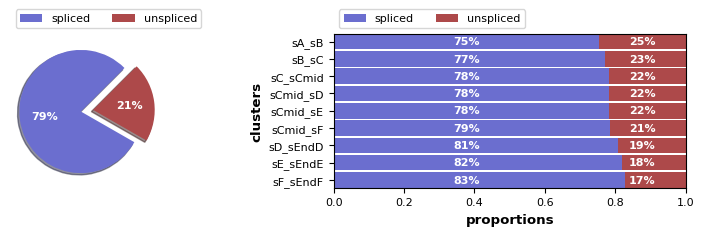

In [13]:
############################## velocity_pca2
for simuID in simuID_list:
    adata_raw = scv.read("/lustre/home/zhangxiaochang/project/liyr/data/dyngen/result_0921/anndata/"+simuID+"/anndata.h5ad")
    print(simuID,adata_raw.shape[1])
    scv.pl.proportions(adata_raw)